<a href="https://colab.research.google.com/github/aryannuka/data-science/blob/main/Aryan_Unit_7_Project_on_US_Soybean_Futures_(Volume_Purchased_over_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU7proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU7proj.ipynb"

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!

**Task**:

Two parts:

1. Propose a data set that's compatible with pymc and/or bambi. I must approve your submission before you move on to part 2.

2. Create, analyze, and present any guassian process or approximate GP, degenerate or otherwise (this means glms and b splines are allowed), using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is), or if must be an actual GP
  - You must document and explain your model selection method. This means you must argue that your model choice (glm, b spline, GP) is better than at least one other choice. You may use either a theoretical or numerical argument.



Guidlines:

- Your data or your model type must be different from any project you've previously done.

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a model or likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- This is not a competition to come up with the fanciest model structure. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- I actually encourge you to use b splines; they work quite well, and trying to determine the location of the knots requires careful thought about the context of the data.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


# US Soybean Futures trading volume as time passes

I chose to use Gaussian Processes (GPs) to model US Soybean Futures trading volume over time because they naturally adapt to the complex, non-linear patterns present in the data. Unlike traditional regression models that require us to predefine the shape of the relationship (like polynomial), GPs allow the data to define its own structure, capturing both short-term fluctuations and long-term trends in trading volume. Since futures markets experience a lot of volatility, with volume surges at key moments, GPs are best for handling these variations without overfitting. Furthermore, because trading volume is highly correlated over time (meaning today’s volume affects tomorrow’s), the covariance kernel in a GP makes sure that predictions account for these dependencies. By using a Hilbert Space Gaussian Process (HSGP), it also improves computational efficiency, making it possible to analyze large historical time-series data while maintaining the flexibility that makes GPs so powerful. This allows us to create smooth, probabilistic predictions that show the uncertainty that's essential for financial modeling, where risk assessment is crucial.

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install preliz
!pip install bambi
import preliz as pz
import bambi as bmb
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-r5qw913v
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-r5qw913v
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached bambi-0.15.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached formulae-0.5.4-py3-none-any.whl.metadata (4.5 kB)
Using cached bambi-0.15.0-py3-none-any.whl (109 kB)
Using cached formulae-0.5.4-py3-none-any.whl (53 kB)


In [ ]:
soy = pd.read_csv('https://raw.githubusercontent.com/aryannuka/data-science/refs/heads/main/US%20Soubeans%20Future%20Data%20-%20US%20Soybeans%20Futures%20Historical%20Data%20(2)%20(2).csv')
soy

,Date,Price,Open,High,Low,Vol.,Volume,Change %
0,02/27/2025,"1,024.63","1,024.25","1,034.13","1,020.63",30.60K,30600,0.01%
1,02/26/2025,"1,024.50","1,030.00","1,032.75","1,021.25",74.75K,74750,-0.65%
2,02/25/2025,"1,031.25","1,029.00","1,035.00","1,019.50",117.59K,117590,0.22%
3,02/24/2025,"1,029.00","1,038.25","1,043.00","1,027.00",101.53K,101530,-1.01%
4,02/21/2025,"1,039.50","1,043.75","1,049.25","1,036.50",115.93K,115930,-0.57%
...,...,...,...,...,...,...,...,...
1016,03/05/2021,"1,430.00","1,410.50","1,433.25","1,403.25",94.02K,94020,1.38%
1017,03/04/2021,"1,410.50","1,409.00","1,438.00","1,403.50",140.37K,140370,0.21%
1018,03/03/2021,"1,407.50","1,415.00","1,417.75","1,395.25",83.31K,83310,-0.35%
1019,03/02/2021,"1,412.50","1,393.50","1,416.50","1,380.75",110.17K,110170,1.53%


In [ ]:
soy["Volume"] = pd.to_numeric(soy["Volume"], errors="coerce")
soy["Date"] = pd.to_datetime(soy["Date"], errors="coerce")
soy.dropna(subset=["Date", "Volume"], inplace=True)

soy["Time"] = (soy["Date"] - soy["Date"].min()).dt.days
date = soy["Time"].values[:, None]
price = soy["Volume"].values.flatten()
soy

,Date,Price,Open,High,Low,Vol.,Volume,Change %,Date1,Time
0,2025-02-27,"1,024.63","1,024.25","1,034.13","1,020.63",30.60K,30600,0.01%,1459,1459
1,2025-02-26,"1,024.50","1,030.00","1,032.75","1,021.25",74.75K,74750,-0.65%,1458,1458
2,2025-02-25,"1,031.25","1,029.00","1,035.00","1,019.50",117.59K,117590,0.22%,1457,1457
3,2025-02-24,"1,029.00","1,038.25","1,043.00","1,027.00",101.53K,101530,-1.01%,1456,1456
4,2025-02-21,"1,039.50","1,043.75","1,049.25","1,036.50",115.93K,115930,-0.57%,1453,1453
...,...,...,...,...,...,...,...,...,...,...
1016,2021-03-05,"1,430.00","1,410.50","1,433.25","1,403.25",94.02K,94020,1.38%,4,4
1017,2021-03-04,"1,410.50","1,409.00","1,438.00","1,403.50",140.37K,140370,0.21%,3,3
1018,2021-03-03,"1,407.50","1,415.00","1,417.75","1,395.25",83.31K,83310,-0.35%,2,2
1019,2021-03-02,"1,412.50","1,393.50","1,416.50","1,380.75",110.17K,110170,1.53%,1,1


I had to check if the data values are numerical and had to change data in the table to be in digits rather than "1000" displayed as K, which is seen with the "Vol." column, thus the creation of the column "Volume". The following checks whether the data is able to be read in a numerical format.

In [ ]:
print(date.shape)
print(np.unique(date)) #Checking that date values are numerical

(1021, 1)
[   0    1    2 ... 1457 1458 1459]


In [ ]:
def get_ig_params(x_vals, l_b=None, u_b=None, mass=0.96, plot=False):
    """
    Returns a weakly informative prior for the length-scale parameter of the GP kernel.
    """

    differences = np.abs(np.subtract.outer(x_vals, x_vals))
    if l_b is None:
        l_b = np.min(differences[differences != 0]) * 2
    if u_b is None:
        u_b = np.max(differences) / 1.5

    dist = pz.InverseGamma()
    pz.maxent(dist, l_b, u_b, mass, plot=plot)

    return dict(zip(dist.param_names, dist.params))

In [ ]:
#Model:

with pm.Model() as model:
  #prior for our smoothness parameter
  ℓ = pm.InverseGamma('ℓ', **get_ig_params(date.flatten()))
  #this is our kernal, which decides how our points relate to one another
  cov=pm.gp.cov.ExpQuad(1,ls=ℓ)
  #this specfices that we're using an HSGP
  gp = pm.gp.HSGP(m=[10], c=1.5, cov_func=cov)
  #f is for function, as in the function we use to transform our data
  f=gp.prior('f',  X=date)
  #prior for the neg binomial
  α = pm.HalfNormal('α', 1)
  #likelihood
  y = pm.Normal("y", mu=f, sigma=α, observed=soy["Volume"])

  idata_hsgp = pm.sample()


Output()

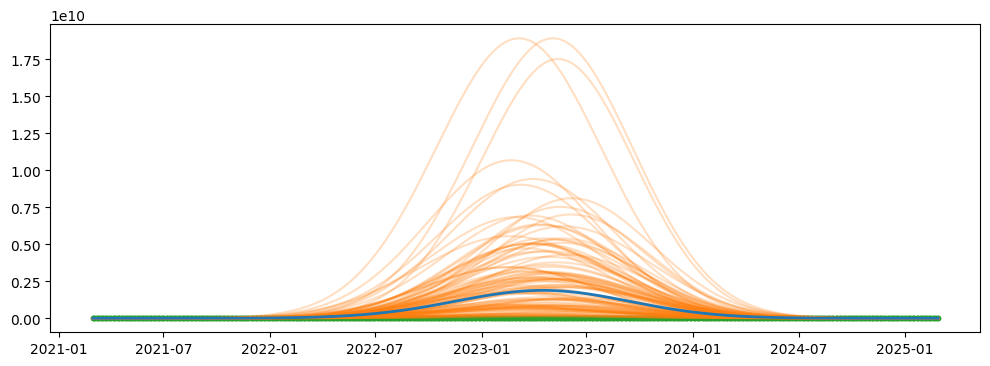

In [ ]:
#set up plot
_, ax = plt.subplots(1, 1, figsize=(12, 4))
#plot raw data
ax.plot(soy["Date"].values, soy["Volume"].values, "C2.")

#grab posterior
f = az.extract(idata_hsgp, group="posterior", var_names="f")


idx = np.argsort(soy["Date"].values)
#plot samples of the posterior
ax.plot(soy["Date"].values[idx], np.exp(f.values[idx,:100]), alpha=0.25, color="C1")
#plot posterior mean
ax.plot(soy["Date"].values[idx], np.exp(f.values[idx].mean(1)), color="C0", lw=2)

The observed volume of soybean futures over time appears relatively stable, with no significant upward or downward trends in the actual data points. The raw data suggests that trading volume has remained consistent without extreme fluctuations. However, the Gaussian Process model's posterior predictive samples indicate large spikes around mid-2023, which don't align with the observed trend. This suggests that the model may be overestimating uncertainty or misinterpreting short-term variations as significant trends. The exaggerated predictive curves likely result from improper scaling of date values, an overly sensitive length-scale in the kernel, or the impact of exponentiating the latent function. Overall, the actual volume data does not exhibit drastic changes over time, indicating that the market for soybean futures stayed steady, while the model’s current configuration may need refinement to better capture the true underlying pattern.

In [8]:
file_path = "https://raw.githubusercontent.com/aryannuka/data-science/refs/heads/main/US%20Soubeans%20Future%20Data%20-%20US%20Soybeans%20Futures%20Historical%20Data%20(2)%20(2).csv"
soy = pd.read_csv(file_path, parse_dates=["Date"])

In [9]:
soy["days_since_start"] = (soy["Date"] - soy["Date"].min()).dt.days

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


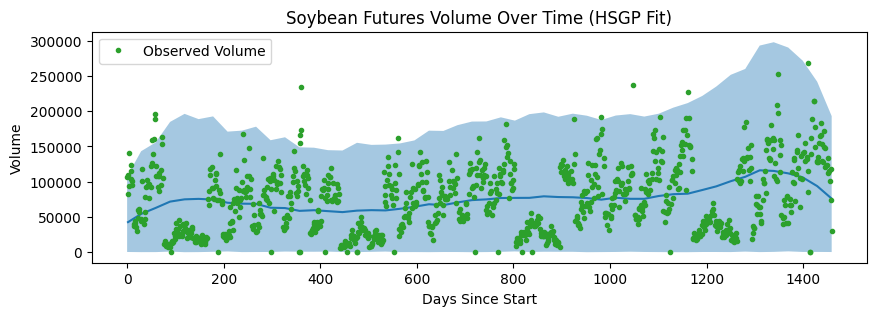

In [10]:
# Corrected priors for the HSGP model
prior_gp = {
    "sigma": bmb.Prior("Gamma", mu=1, sigma=0.01),
    "ell": bmb.Prior("InverseGamma", alpha=3, beta=1)  # Corrected format
}

priors = {
    "hsgp(days_since_start, m=10, c=1.5)": prior_gp,
    "alpha": bmb.Prior("HalfNormal", sigma=1)
}

# Define and fit the Bayesian HSGP model
model_hsgp = bmb.Model(
    "Volume ~ 0 + hsgp(days_since_start, m=10, c=1.5)",
    soy,
    family="negativebinomial",  # Suitable for count data
    priors=priors
)

# Fit the model
idata_hsgp = model_hsgp.fit()

# Generate posterior predictive plot
fig, ax = bmb.interpret.plot_predictions(
    model_hsgp,
    idata_hsgp,
    ["days_since_start"],
    pps=True,  # Show posterior predictive bands
    fig_kwargs={"figsize": (10, 3)}
)

# Overlay raw data
ax[0].plot(soy["days_since_start"].values, soy["Volume"].values, "C2.", label="Observed Volume")
ax[0].set_xlabel("Days Since Start")
ax[0].set_ylabel("Volume")
ax[0].set_title("Soybean Futures Volume Over Time (HSGP Fit)")
ax[0].legend()

# Show the plot
plt.show()


The graph illustrates the trading volume of soybean futures over time, where the green dots represent observed data points, the blue line represents the predicted mean trend, and the shaded blue region reflects the uncertainty in the model’s predictions. Initially, there is a wide range of volume fluctuations, with some days showing significantly higher trading activity, but as time progresses, volume appears to stabilize within a predictable range. The Gaussian Process (GP) model captures a slight upward trend in volume, suggesting a potential long-term increase in trading activity. However, the uncertainty increases towards the later part of the timeline, as seen by the widening of the blue band. This suggests that while the model captures some structure in the data, there is still high variability in trading volume, possibly due to market factors, seasonality, or external economic influences affecting soybean futures.